In [1]:
#instalacja i import pandas
!pip3 install pandas
import pandas as pd

In [2]:
# wczytanie .csv z danymi
data = pd.read_csv("spotify_most_streamed_2024.csv", encoding='ISO-8859-1')
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
# usunięcie wierszy, gdzie liczba wyświetleń jest pusta
data = data.dropna(subset=['Spotify Streams'])

In [4]:
# zamiana typu danych dla kolumny z wyświetleniami z object na int
data['Spotify Streams'] = data['Spotify Streams'].str.replace(',', '').astype(int)

In [5]:
# usuwanie podwójnych (w sensie mających taką samą nazwę piosenki) rekordów, zostawiając te o większej liczbie wyświetleń
data = data.loc[data.groupby('Track')['Spotify Streams'].idxmax()]

In [6]:
# wybranie 10 rekordów z największą liczbą wyświetleń
top_10_streams = data.nlargest(10, 'Spotify Streams')
top_10_streams

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
55,Blinding Lights,Blinding Lights,The Weeknd,11/29/2019,USUG11904206,56,194.0,4281468720,"590,392","165,544,011",...,"1,116",564.0,"11,701,129",184.0,"489,299,762","319,634","28,659,471","28,994,660",NaN,0
53,Shape of You,Shape of You,Ed Sheeran,1/6/2017,GBAHS1600463,54,195.1,3909458734,"316,378","148,037,882",...,282,512.0,"2,710,931",115.0,"733,565,655","651,557","78,149,375","1,146,246",NaN,0
132,Someone You Loved,Breach,Lewis Capaldi,11/8/2018,DEUM71807062,133,129.7,3427498835,"338,763","160,553,919",...,381,502.0,"4,834,088",110.0,"427,212,257","357,540",NaN,"29,266,297",NaN,0
114,Sunflower - Spider-Man: Into the Spider-Verse,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,10/18/2018,USUM71814888,116,143.9,3358704125,"392,082","123,917,182",...,NaN,86.0,"809,352",99.0,"546,367,356","906,813",NaN,"1,569,935",NaN,0
19,As It Was,As It Was,Harry Styles,3/31/2022,USSM12200612,20,292.0,3301814535,"407,119","169,783,402",...,"4,909",330.0,"12,907,852",189.0,"132,624,772","79,909",NaN,"14,967,379",NaN,0
262,Starboy,Starboy,The Weeknd,9/22/2016,USUG11600976,265,95.7,3291262413,"366,133","98,022,646",...,148,118.0,"875,683",67.0,"331,295,154","418,888","23,612,071","15,648,166",NaN,1
519,One Dance,One Dance (feat. Wizkid & Kyla) - Single,Drake,4/4/2016,USCM51600028,518,67.9,3192204066,"379,853","131,832,723",...,932,165.0,"1,383,884",97.0,"714,508,129","601,041",NaN,"21,316,589",NaN,0
26,STAY (with Justin Bieber),STAY (with Justin Bieber),The Kid LAROI,7/9/2021,USSM12103949,27,266.3,3107100349,"451,732","134,793,519",...,"4,096",166.0,"5,783,693",128.0,"196,783,487","124,922","36,341,585",NaN,NaN,1
39,Dance Monkey,Dance Monkey,Tones And I,5/10/2019,QZES71982312,40,214.5,3071214106,"375,201","64,901,153",...,169,584.0,"5,749,770",121.0,"373,294,159","844,198","37,430,204","44,842,636",NaN,0
118,Believer,Believer,Imagine Dragons,1/31/2017,USUM71700626,119,142.2,3006226762,"335,880","89,243,475",...,388,118.0,"1,138,425",71.0,"614,578,695","844,301","2,943,611","21,306,706",NaN,0


In [7]:
# Dodanie specjalnie formatowanej kolumny dla lepszej czytelności liczby wyświetleń
top_10_streams['Spotify Streams (formated)'] = top_10_streams['Spotify Streams'].apply(lambda x: f'{x:,}')

In [8]:
# Wyświetlenie rekordów z 10 najczęściej słuchanymi piosenkami, zostawiając tylko te ciekawe kolumny
top_10_streams[['Track', 'Artist', 'Spotify Streams (formated)']]

,Track,Artist,Spotify Streams (formated)
55,Blinding Lights,The Weeknd,"4,281,468,720"
53,Shape of You,Ed Sheeran,"3,909,458,734"
132,Someone You Loved,Lewis Capaldi,"3,427,498,835"
114,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,"3,358,704,125"
19,As It Was,Harry Styles,"3,301,814,535"
262,Starboy,The Weeknd,"3,291,262,413"
519,One Dance,Drake,"3,192,204,066"
26,STAY (with Justin Bieber),The Kid LAROI,"3,107,100,349"
39,Dance Monkey,Tones And I,"3,071,214,106"
118,Believer,Imagine Dragons,"3,006,226,762"


In [11]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [12]:
!pip install seaborn
import seaborn as sns

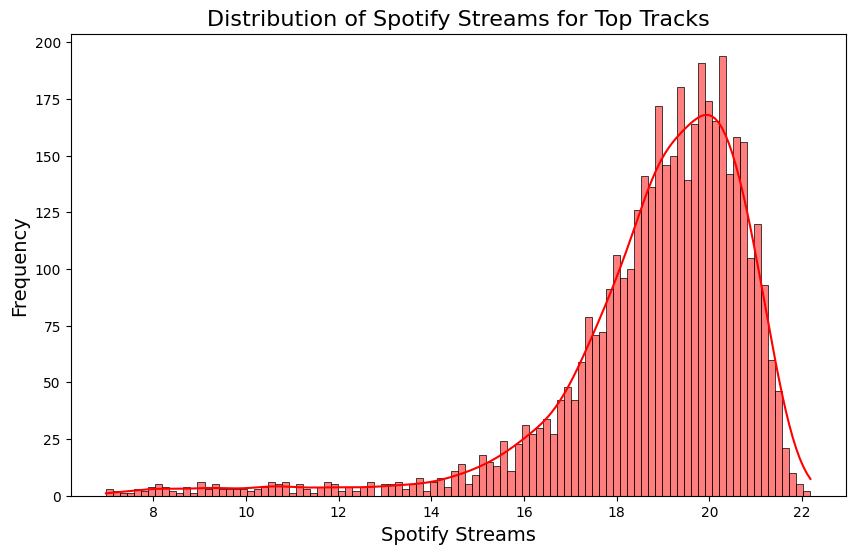

In [24]:
%matplotlib inline
import numpy as np

# Tworzenie histogramu liczby streamów
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['Spotify Streams'].values), bins=100, kde=True, color='red')

# Dodanie tytułu i etykiet osi
plt.title('Distribution of Spotify Streams for Top Tracks', fontsize=16)
plt.xlabel('Spotify Streams', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Pokazanie wykresu
plt.show()

C:\Users\Bartek\AppData\Local\Temp\ipykernel_12980\1640196571.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter.set_xticklabels(scatter.get_xticklabels(), rotation=90)


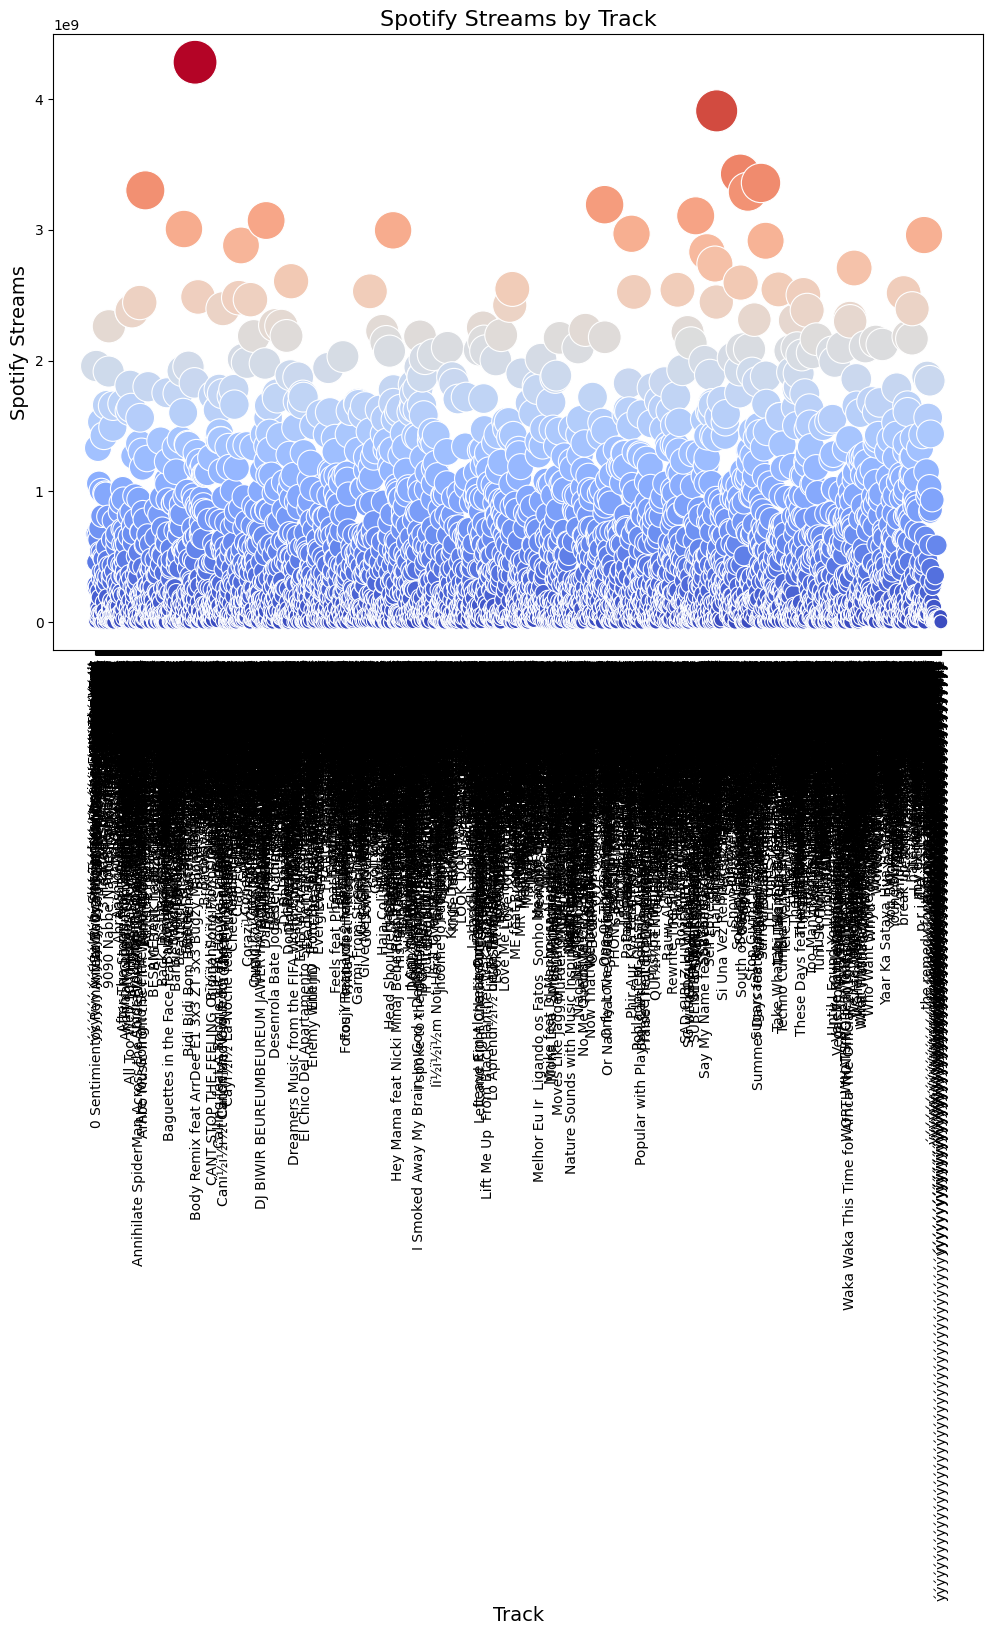

In [22]:
# Tworzenie scatter plotu
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Track', 
    y='Spotify Streams', 
    size='Spotify Streams', 
    hue='Spotify Streams', 
    data=data,
    palette='coolwarm', 
    sizes=(100, 1000),  # Zakres rozmiarów punktów
    legend=False
)

# Rotacja nazw utworów na osi X dla lepszej czytelności
scatter.set_xticklabels(scatter.get_xticklabels(), rotation=90)

# Dodanie tytułu i etykiet osi
plt.title('Spotify Streams by Track', fontsize=16)
plt.xlabel('Track', fontsize=14)
plt.ylabel('Spotify Streams', fontsize=14)

# Pokazanie wykresu
plt.show()

In [21]:
data['Track'] = data['Track'].str.replace(r'[^\w\s]', '', regex=True)